In [26]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

font_size = 15
font_size_ticks = 10

np.set_printoptions(precision=5)

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

file_path = "./hourly_precipitation_2015.npy"

# data_matrix contains precipitation data from 134 stations (each station is a column)
data_matrix = np.load(file_path)

print(data_matrix.shape) 
print(data_matrix[25:35,:10])

(8760, 134)
[[0.  1.  0.3 0.7 0.  0.2 1.  0.2 0.  0.4]
 [0.  0.4 0.2 0.3 0.  0.6 1.9 1.1 0.  0. ]
 [0.  0.6 0.  0.  0.  0.2 0.7 1.1 0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.4 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
 [0.  0.  0.6 0.2 0.  0.  0.5 0.2 0.  0.7]
 [0.  0.  0.9 0.9 0.  0.  1.3 0.  0.  0.6]
 [0.  0.3 0.6 1.2 0.  0.4 1.9 0.  0.  0.2]
 [0.  0.  0.3 0.  0.  0.6 0.6 0.4 0.  0.6]
 [0.  0.  0.5 0.  0.  0.2 0.5 0.6 0.  0.3]]


In [2]:
# We select three stations to study, stations contains the corresponding indices in data_matrix
# 24: Bodega, CA
# 99: Coos Bay, OR
# 102: Riley, OR
stations = [24,99,102]

## HW4 - Q4

In [3]:
# Compute joint pmf of three Bernoulli random variables indicating whether it rains (1) or not (0)
# in Bodega, Coos Bay and Riley
def compute_joint_pmf(station_1,station_2,station_3,data_matrix):    
    # creating 2*2*2 array. i.e) counts[0][0][0] = station1 = 0, station2 = 0 , station3 = 0
    counts = np.array([[[0,0],[0,0]],[[0,0],[0,0]]])
    
    # create data_matrix for each stations
    rv1 = data_matrix[:,station_1]
    rv2 = data_matrix[:,station_2]
    rv3 = data_matrix[:,station_3]
    
    # loop for every columns and append to each given array index
    for i in range(data_matrix.shape[0]):
        if rv1[i] <= 0 and rv2[i] <= 0 and rv3[i] <= 0:
            counts[0][0][0] += 1
        elif rv1[i] <= 0 and rv2[i] <= 0 and rv3[i] > 0:
            counts[0][0][1] += 1
        elif rv1[i] <= 0 and rv2[i] > 0 and rv3[i] <= 0:
            counts[0][1][0] += 1
        elif rv1[i] <= 0 and rv2[i] > 0 and rv3[i] > 0:
            counts[0][1][1] += 1
        elif rv1[i] > 0 and rv2[i] <= 0 and rv3[i] <= 0:
            counts[1][0][0] += 1
        elif rv1[i] > 0 and rv2[i] <= 0 and rv3[i] > 0:
            counts[1][0][1] += 1
        elif rv1[i] > 0 and rv2[i] > 0 and rv3[i] <= 0:
            counts[1][1][0] += 1
        elif rv1[i] > 0 and rv2[i] > 0 and rv3[i] > 0:
            counts[1][1][1] += 1

    # get probability by dividing total counts
    joint_pmf = counts / data_matrix.shape[0]                        
    
    return counts , joint_pmf
   
counts, joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)

print(counts)
print()
print(joint_pmf)

[[[7472  186]
  [ 814   89]]

 [[  88   21]
  [  75   15]]]

[[[0.85297 0.02123]
  [0.09292 0.01016]]

 [[0.01005 0.0024 ]
  [0.00856 0.00171]]]


[0.98836 0.0234 ]
[0.88664 0.11336]
[0.9645 0.0355]


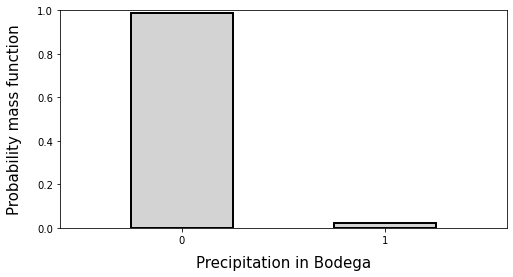

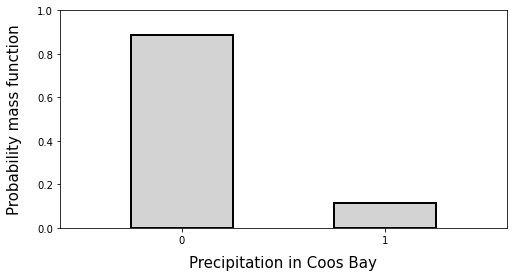

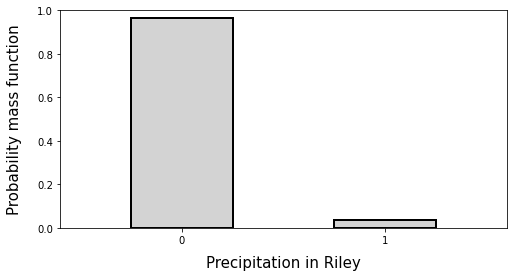

In [27]:
# Compute marginal pmf of each of the Bernoulli random variables 
def marginal_1_station(joint_pmf):
    # INSERT YOUR CODE HERE
    
    # for each marginal pmf, add all probabilities fixing certain station by 0 and 1
    marginal_pmf_1 = np.array([joint_pmf[0][0][0] + joint_pmf[0][0][1] + joint_pmf[0][1][0] + joint_pmf[0][0][1],
                               joint_pmf[1][0][0] + joint_pmf[1][0][1] + joint_pmf[1][1][0] + joint_pmf[1][0][1]])
    
    marginal_pmf_2 = np.array([joint_pmf[0][0][0] + joint_pmf[0][0][1] + joint_pmf[1][0][0] + joint_pmf[1][0][1],
                               joint_pmf[0][1][0] + joint_pmf[0][1][1] + joint_pmf[1][1][0] + joint_pmf[1][1][1]])
    
    marginal_pmf_3 = np.array([joint_pmf[0][0][0] + joint_pmf[0][1][0] + joint_pmf[1][0][0] + joint_pmf[1][1][0],
                               joint_pmf[0][0][1] + joint_pmf[0][1][1] + joint_pmf[1][0][1] + joint_pmf[1][1][1]])
    

    return marginal_pmf_1, marginal_pmf_2, marginal_pmf_3
    

marginal_pmf_1,marginal_pmf_2,marginal_pmf_3 = marginal_1_station(joint_pmf)
print(marginal_pmf_1)
print(marginal_pmf_2)
print(marginal_pmf_3)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6
plt.figure(figsize=(8,4))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 15)
plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 10)
plt.savefig('./precipitation_marginal_pmf_1.pdf',bbox_inches="tight")

plt.figure(figsize=(8,4))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 15)
plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 10)
plt.savefig('./precipitation_marginal_pmf_2.pdf',bbox_inches="tight")

plt.figure(figsize=(8,4))
plt.bar(vals,marginal_pmf_3, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 15)
plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 10)
plt.savefig('./precipitation_marginal_pmf_3.pdf',bbox_inches="tight")

In [5]:
# Compute marginal joint pmf of each pair of the Bernoulli random variables 
def marginal_2_stations(joint_pmf):
    # INSERT YOUR CODE HERE
    
    # for certain pmf, think pair as (0,0), (0,1), (1,1), (1,1) and sum excluded station counts for each pair
    marginal_pmf_12 = np.array([[joint_pmf[0][0][0] + joint_pmf[0][0][1], joint_pmf[0][1][0] + joint_pmf[0][1][1]],
                                [joint_pmf[1][0][0] + joint_pmf[1][0][1], joint_pmf[1][1][0] + joint_pmf[1][1][1]]])
    
    marginal_pmf_13 = np.array([[joint_pmf[0][0][0] + joint_pmf[0][1][0], joint_pmf[0][0][1] + joint_pmf[0][1][1]],
                                [joint_pmf[1][0][0] + joint_pmf[1][0][1], joint_pmf[1][1][0] + joint_pmf[1][1][1]]])
    
    marginal_pmf_23 = np.array([[joint_pmf[0][0][0] + joint_pmf[1][0][0], joint_pmf[0][0][1] + joint_pmf[1][0][1]],
                                [joint_pmf[0][1][0] + joint_pmf[1][1][0], joint_pmf[0][1][1] + joint_pmf[1][1][1]]])
    
    return marginal_pmf_12,marginal_pmf_13,marginal_pmf_23

marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)

print(marginal_pmf_12)
print()
print(marginal_pmf_13)
print()
print(marginal_pmf_23)

[[0.8742  0.10308]
 [0.01244 0.01027]]

[[0.94589 0.03139]
 [0.01244 0.01027]]

[[0.86301 0.02363]
 [0.10148 0.01187]]


[0.9883597883597883, 0.01164021164021164]
[0.8985507246376812, 0.10144927536231885]
[0.9156355455568054, 0.0843644544431946]
[0.8557692307692307, 0.14423076923076922]
[0.9017620082066136, 0.09823799179338642]
[0.6763636363636364, 0.32363636363636367]
[0.539877300613497, 0.4601226993865031]
[0.5833333333333333, 0.4166666666666666]
[0.9757116740663359, 0.024288325933664142]
[0.9014396456256922, 0.09856035437430788]
[0.8073394495412843, 0.1926605504587156]
[0.8333333333333334, 0.16666666666666666]


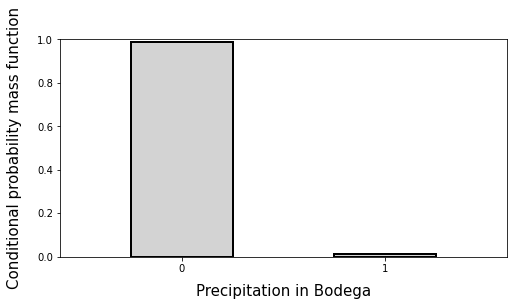

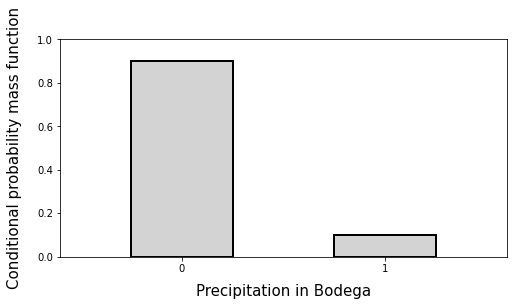

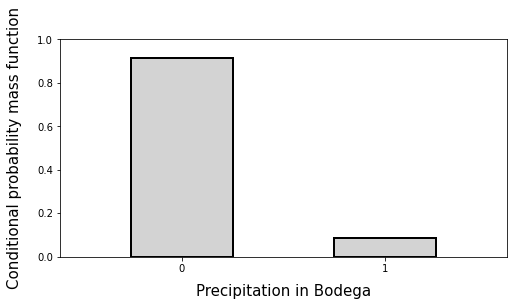

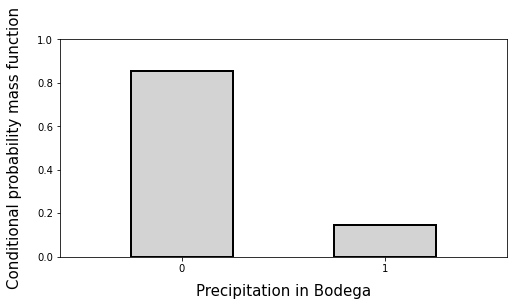

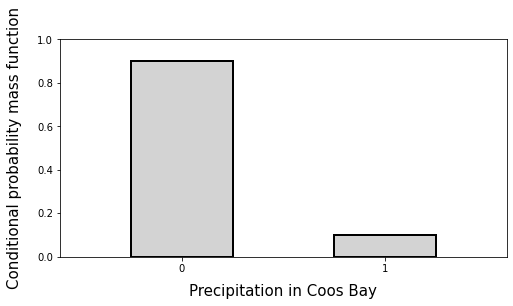

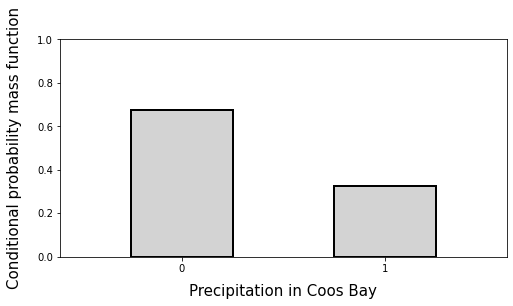

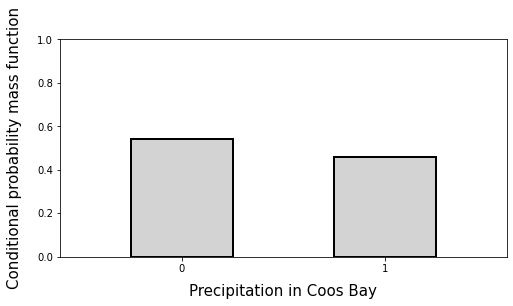

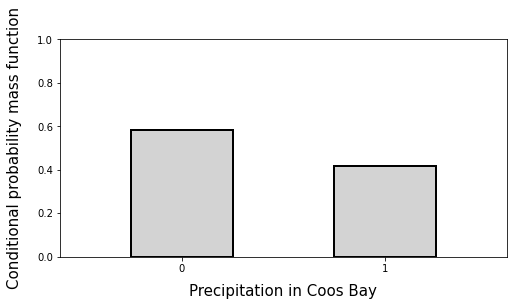

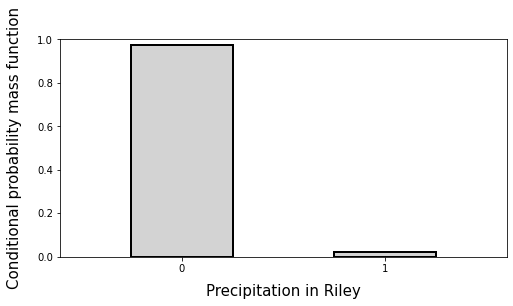

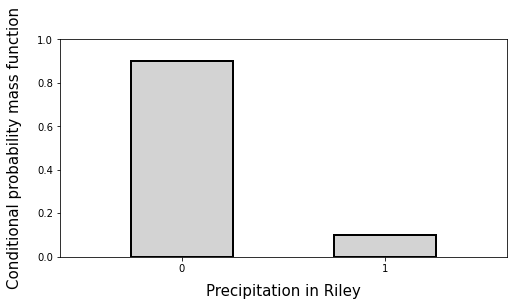

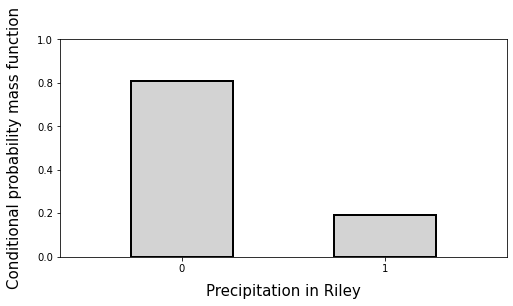

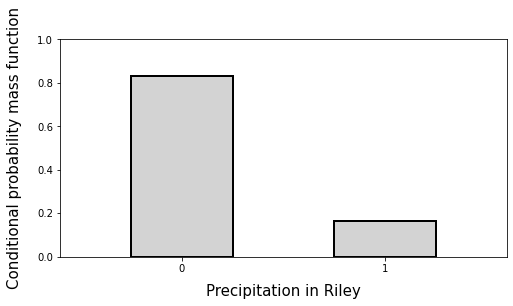

In [31]:
# Compute conditional pmf of each of the Bernoulli random variables given the other two 
def conditional_1_station_given_2(joint_pmf):
    # INSERT YOUR CODE HERE
    
    # For example, given 2,3 as (0,0), get station 1 = 0 and station1 = 1 in a list
    # list up for other cases 
    cond_1_given_23 = [[[joint_pmf[0][0][0]/(joint_pmf[0][0][0]+joint_pmf[1][0][0]), 
                         joint_pmf[1][0][0]/(joint_pmf[0][0][0]+joint_pmf[1][0][0])],
                        [joint_pmf[0][0][1]/(joint_pmf[0][0][1]+joint_pmf[1][0][1]),
                         joint_pmf[1][0][1]/(joint_pmf[0][0][1]+joint_pmf[1][0][1])]],
                       [[joint_pmf[0][1][0]/(joint_pmf[0][1][0]+joint_pmf[1][1][0]),
                         joint_pmf[1][1][0]/(joint_pmf[0][1][0]+joint_pmf[1][1][0])],
                        [joint_pmf[0][1][1]/(joint_pmf[0][1][1]+joint_pmf[1][1][1]),
                         joint_pmf[1][1][1]/(joint_pmf[0][1][1]+joint_pmf[1][1][1])]]]
    
    cond_2_given_13 = [[[joint_pmf[0][0][0]/(joint_pmf[0][0][0]+joint_pmf[0][1][0]), 
                         joint_pmf[0][1][0]/(joint_pmf[0][0][0]+joint_pmf[0][1][0])],
                        [joint_pmf[0][0][1]/(joint_pmf[0][0][1]+joint_pmf[0][1][1]),
                         joint_pmf[0][1][1]/(joint_pmf[0][0][1]+joint_pmf[0][1][1])]],
                       [[joint_pmf[1][0][0]/(joint_pmf[1][0][0]+joint_pmf[1][1][0]),
                         joint_pmf[1][1][0]/(joint_pmf[1][0][0]+joint_pmf[1][1][0])],
                        [joint_pmf[1][0][1]/(joint_pmf[1][0][1]+joint_pmf[1][1][1]),
                         joint_pmf[1][1][1]/(joint_pmf[1][0][1]+joint_pmf[1][1][1])]]]
    
    cond_3_given_12 = [[[joint_pmf[0][0][0]/(joint_pmf[0][0][0]+joint_pmf[0][0][1]), 
                         joint_pmf[0][0][1]/(joint_pmf[0][0][0]+joint_pmf[0][0][1])],
                        [joint_pmf[0][1][0]/(joint_pmf[0][1][0]+joint_pmf[0][1][1]),
                         joint_pmf[0][1][1]/(joint_pmf[0][1][0]+joint_pmf[0][1][1])]],
                       [[joint_pmf[1][0][0]/(joint_pmf[1][0][0]+joint_pmf[1][0][1]),
                         joint_pmf[1][0][1]/(joint_pmf[1][0][0]+joint_pmf[1][0][1])],
                        [joint_pmf[1][1][0]/(joint_pmf[1][1][0]+joint_pmf[1][1][1]),
                         joint_pmf[1][1][1]/(joint_pmf[1][1][0]+joint_pmf[1][1][1])]]]

                       
    return cond_1_given_23, cond_2_given_13, cond_3_given_12   
                       

cond_1_given_23, cond_2_given_13, cond_3_given_12 = conditional_1_station_given_2(joint_pmf)


for ind_2 in range(2):
    for ind_3 in range(2):
        print(cond_1_given_23[ind_2][ind_3])
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_1_given_23[ind_2][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 15)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 10)
        plt.savefig('./precipitation_cond_pmf_1_given_2eq'+str(ind_2)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_3 in range(2):
        print(cond_2_given_13[ind_1][ind_3])
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_2_given_13[ind_1][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 15)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 10)
        plt.savefig('./precipitation_cond_pmf_2_given_1eq'+str(ind_1)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_2 in range(2):
        print(cond_3_given_12[ind_1][ind_2])
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_3_given_12[ind_1][ind_2], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 15)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 10)
        plt.savefig('./precipitation_cond_pmf_3_given_1eq'+str(ind_1)+'_2eq'+str(ind_2)+'.pdf',bbox_inches="tight")


In [7]:
# Compute conditional joint pmf of each pair of the Bernoulli random variables given the other one
def conditional_2_stations_given_1(joint_pmf):
    # INSERT YOUR CODE HERE
    
    # create sum of each case conditioned by 3,2,1 with condition = 0 or 1
    sum_given_3_0 = joint_pmf[0][0][0] + joint_pmf[0][1][0] + joint_pmf[1][0][0] + joint_pmf[1][1][0]
    sum_given_3_1 = joint_pmf[0][0][1] + joint_pmf[0][1][1] + joint_pmf[1][0][1] + joint_pmf[1][1][1]
    
    sum_given_2_0 = joint_pmf[0][0][0] + joint_pmf[0][0][1] + joint_pmf[1][0][0] + joint_pmf[1][0][1]
    sum_given_2_1 = joint_pmf[0][1][0] + joint_pmf[0][1][1] + joint_pmf[1][1][0] + joint_pmf[1][1][1]
    
    sum_given_1_0 = joint_pmf[0][0][0] + joint_pmf[0][0][1] + joint_pmf[0][1][0] + joint_pmf[0][1][1]
    sum_given_1_1 = joint_pmf[1][0][0] + joint_pmf[1][0][1] + joint_pmf[1][1][0] + joint_pmf[1][1][1]    

    
    # for example, given 3 = 0, make a 2X2 matrix with station 1, station 2 
    # Also, normailize by given sums that are created on the top
    cond_12_given_3 = np.array([[[joint_pmf[0][0][0]/sum_given_3_0, joint_pmf[0][1][0]/sum_given_3_0],
                                 [joint_pmf[1][0][0]/sum_given_3_0, joint_pmf[1][1][0]/sum_given_3_0]],
                                [[joint_pmf[0][0][1]/sum_given_3_1, joint_pmf[0][1][1]/sum_given_3_1],
                                 [joint_pmf[1][0][1]/sum_given_3_1, joint_pmf[1][0][1]/sum_given_3_1]]])

    cond_13_given_2 = np.array([[[joint_pmf[0][0][0]/sum_given_2_0, joint_pmf[0][0][1]/sum_given_2_0],
                                 [joint_pmf[1][0][0]/sum_given_2_0, joint_pmf[1][0][1]/sum_given_2_0]],
                                [[joint_pmf[0][1][0]/sum_given_2_1, joint_pmf[0][1][1]/sum_given_2_1],
                                 [joint_pmf[1][1][0]/sum_given_2_1, joint_pmf[1][1][1]/sum_given_2_1]]])
    
    cond_23_given_1 = np.array([[[joint_pmf[0][0][0]/sum_given_1_0, joint_pmf[0][0][1]/sum_given_1_0],
                                 [joint_pmf[0][1][0]/sum_given_1_0, joint_pmf[0][1][1]/sum_given_1_0]],
                                [[joint_pmf[1][0][0]/sum_given_1_1, joint_pmf[1][0][1]/sum_given_1_1],
                                 [joint_pmf[1][1][0]/sum_given_1_1, joint_pmf[1][1][1]/sum_given_1_1]]])


    return cond_12_given_3, cond_13_given_2, cond_23_given_1    
    
cond_12_given_3,cond_13_given_2,cond_23_given_1 = conditional_2_stations_given_1(joint_pmf)

for ind in range(2):
    print(cond_12_given_3[ind])
print()
for ind in range(2):
    print(cond_13_given_2[ind])
print()
for ind in range(2):
    print(cond_23_given_1[ind])

[[0.88437 0.09634]
 [0.01042 0.00888]]
[[0.59807 0.28617]
 [0.06752 0.06752]]

[[0.96202 0.02395]
 [0.01133 0.0027 ]]
[[0.81974 0.08963]
 [0.07553 0.01511]]

[[0.8728  0.02173]
 [0.09508 0.0104 ]]
[[0.44221 0.10553]
 [0.37688 0.07538]]


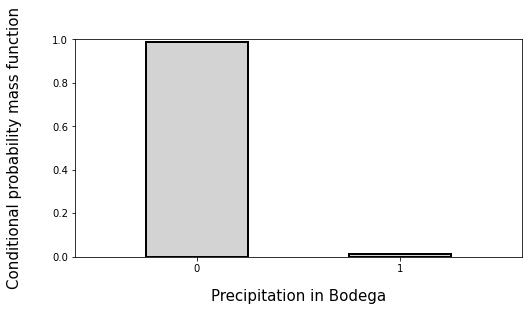

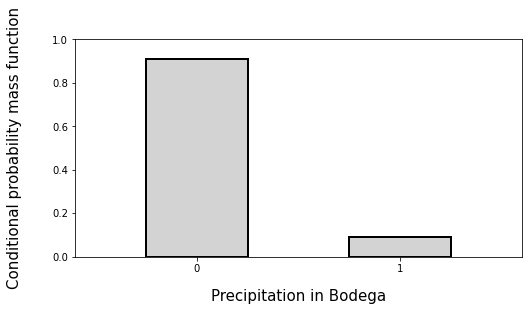

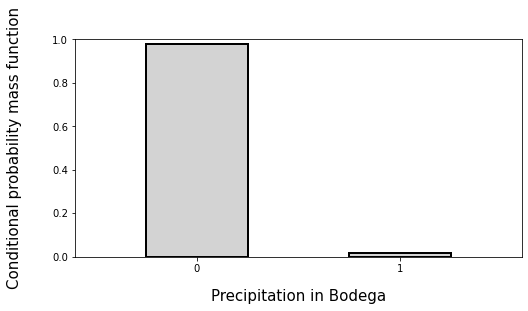

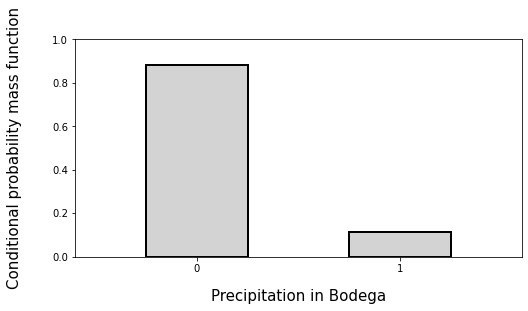

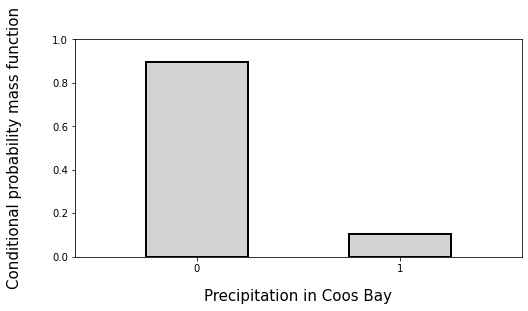

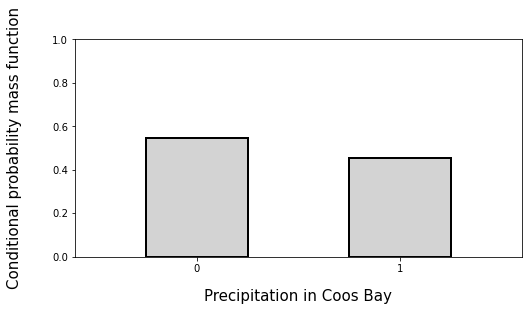

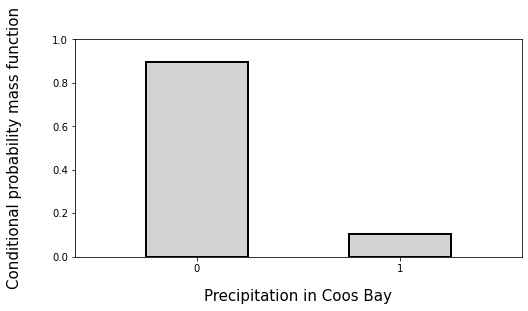

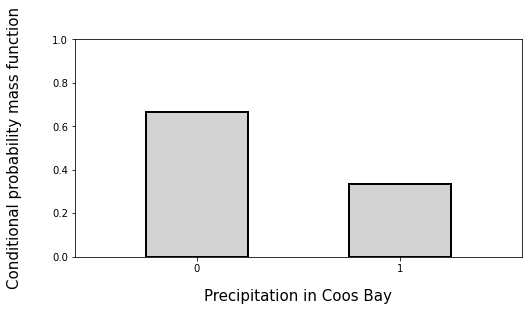

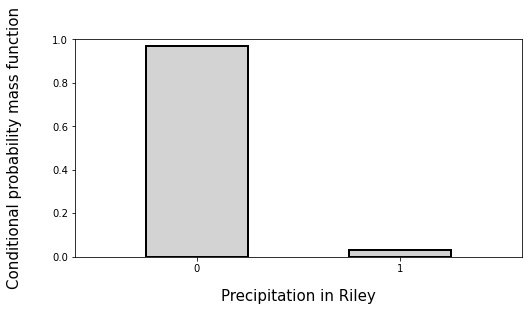

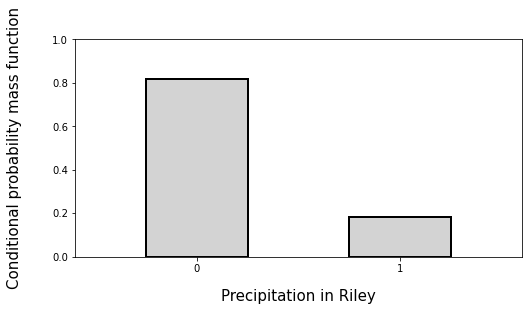

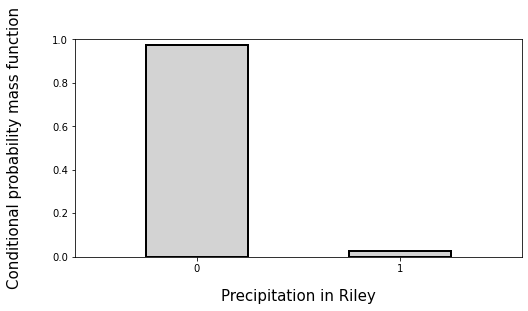

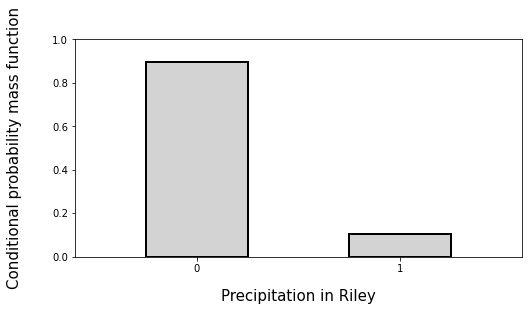

In [30]:
# Compute conditional pmf of each Bernoulli random variable given each of the other ones 
# (i.e. Bodega just conditioned on Coos Bay, Bodega just conditioned on Riley, etc.)
# Use a dictionary to save the conditional pmfs, for example cond_1["2"] should contain the conditional of the
# first random variable (Bodega)
def conditional_1_station_given_1_station(joint_pmf):
    # INSERT YOUR CODE HERE
    
    # Initialize result in a dictionary
    cond_1 = {"2": [[0,0],[0,0]], "3":[[0,0],[0,0]]}
    cond_2 = {"1": [[0,0],[0,0]], "3":[[0,0],[0,0]]}
    cond_3 = {"1": [[0,0],[0,0]], "2":[[0,0],[0,0]]}    
    
    # create sum of each cases (to normalize probabilities)
    sum_c1_2_0 = joint_pmf[0][0][0]+joint_pmf[0][0][1]+joint_pmf[1][0][0]+joint_pmf[1][0][1]
    sum_c1_2_1 = joint_pmf[0][1][0]+joint_pmf[0][1][1]+joint_pmf[1][1][0]+joint_pmf[1][1][1]    
    sum_c1_3_0 = joint_pmf[0][0][0]+joint_pmf[0][1][0]+joint_pmf[1][0][0]+joint_pmf[1][1][0]
    sum_c1_3_1 = joint_pmf[0][0][1]+joint_pmf[0][1][1]+joint_pmf[1][0][1]+joint_pmf[1][1][1] 
        
    sum_c2_1_0 = joint_pmf[0][0][0]+joint_pmf[0][0][1]+joint_pmf[0][1][0]+joint_pmf[0][1][1]
    sum_c2_1_1 = joint_pmf[1][0][0]+joint_pmf[1][0][1]+joint_pmf[1][1][0]+joint_pmf[1][1][1]    
    sum_c2_3_0 = joint_pmf[0][0][0]+joint_pmf[1][0][0]+joint_pmf[0][1][0]+joint_pmf[1][1][0]
    sum_c2_3_1 = joint_pmf[0][0][1]+joint_pmf[1][0][1]+joint_pmf[0][1][1]+joint_pmf[1][1][1]
    
    sum_c3_1_0 = joint_pmf[0][0][0]+joint_pmf[0][1][0]+joint_pmf[0][0][1]+joint_pmf[0][1][1]
    sum_c3_1_1 = joint_pmf[1][0][0]+joint_pmf[1][1][0]+joint_pmf[1][0][1]+joint_pmf[1][1][1]
    sum_c3_2_0 = joint_pmf[0][0][0]+joint_pmf[1][0][0]+joint_pmf[0][0][1]+joint_pmf[1][0][1]
    sum_c3_2_1 = joint_pmf[0][1][0]+joint_pmf[1][1][0]+joint_pmf[0][1][1]+joint_pmf[1][1][1]   
    
    
    # for example, this means that for given station2 = 0, care about station1 = 0 or 1 for every station3
    # continue by given station2 = 1, care about station1 = 0 or 1 for every station3
    # continue this logic to every other cases
    cond_1["2"]=[[(joint_pmf[0][0][0]+joint_pmf[0][0][1])/sum_c1_2_0, 
                  (joint_pmf[1][0][0]+joint_pmf[1][0][1])/sum_c1_2_0],
                 [(joint_pmf[0][1][0]+joint_pmf[0][1][1])/sum_c1_2_1, 
                  (joint_pmf[1][1][0]+joint_pmf[1][1][1])/sum_c1_2_1]]
    
    cond_1["3"]=[[(joint_pmf[0][0][0]+joint_pmf[0][1][0])/sum_c1_3_0, 
                  (joint_pmf[1][0][0]+joint_pmf[1][1][0])/sum_c1_3_0],
                 [(joint_pmf[0][0][1]+joint_pmf[0][1][1])/sum_c1_3_1, 
                  (joint_pmf[1][0][1]+joint_pmf[1][1][1])/sum_c1_3_1]]
    
    cond_2["1"]=[[(joint_pmf[0][0][0]+joint_pmf[0][0][1])/sum_c2_1_0, 
                  (joint_pmf[0][1][0]+joint_pmf[0][1][1])/sum_c2_1_0],
                 [(joint_pmf[1][0][0]+joint_pmf[1][0][1])/sum_c2_1_1, 
                  (joint_pmf[1][1][0]+joint_pmf[1][1][1])/sum_c2_1_1]]
    
    cond_2["3"]=[[(joint_pmf[0][0][0]+joint_pmf[1][0][0])/sum_c2_3_0, 
                  (joint_pmf[0][1][0]+joint_pmf[1][1][0])/sum_c2_3_0],
                 [(joint_pmf[0][0][1]+joint_pmf[1][0][1])/sum_c2_3_1, 
                  (joint_pmf[0][1][1]+joint_pmf[1][1][1])/sum_c2_3_1]]
    
    cond_3["1"]=[[(joint_pmf[0][0][0]+joint_pmf[0][1][0])/sum_c3_1_0, 
                  (joint_pmf[0][0][1]+joint_pmf[0][1][1])/sum_c3_1_0],
                 [(joint_pmf[1][0][0]+joint_pmf[1][1][0])/sum_c3_1_1, 
                  (joint_pmf[1][0][1]+joint_pmf[1][1][1])/sum_c3_1_1]]
    
    cond_3["2"]=[[(joint_pmf[0][0][0]+joint_pmf[1][0][0])/sum_c3_2_0, 
                  (joint_pmf[0][0][1]+joint_pmf[1][0][1])/sum_c3_2_0],
                 [(joint_pmf[0][1][0]+joint_pmf[1][1][0])/sum_c3_2_1, 
                  (joint_pmf[0][1][1]+joint_pmf[1][1][1])/sum_c3_2_1]]       
    
    return cond_1, cond_2, cond_3


cond_1,cond_2,cond_3 = conditional_1_station_given_1_station(joint_pmf)

for given in ["2","3"]:
    for ind in range(2):
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_1[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('./precipitation_cond_pmf_1_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
        
for given in ["1","3"]:
    for ind in range(2):
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_2[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('./precipitation_cond_pmf_2_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")

for given in ["1","2"]:
    for ind in range(2):
        plt.figure(figsize=(8,4))
        plt.bar(vals,cond_3[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('./precipitation_cond_pmf_3_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
